In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import random
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.io
from scipy.io import savemat

In [ ]:
Fli_days_1 = scipy.io.loadmat('/content/drive/MyDrive/Varios/UDENAR/MTE/Códigos Final/Data final/demand_final_1.mat')
Pvi_days_1 = scipy.io.loadmat('/content/drive/MyDrive/Varios/UDENAR/MTE/Códigos Final/Data final/generation_final_1.mat')

Fli_days = Fli_days_1['array']
Pvi_days = Pvi_days_1['array']

print(f'dimensiones demanda: {Fli_days.shape}')
print(f'dimensiones generación: {Pvi_days.shape}')


dimensiones demanda: (5, 5000, 24)
dimensiones generación: (5, 5000, 24)


Tiempo transcurrido: 0.009778261184692383 segundos


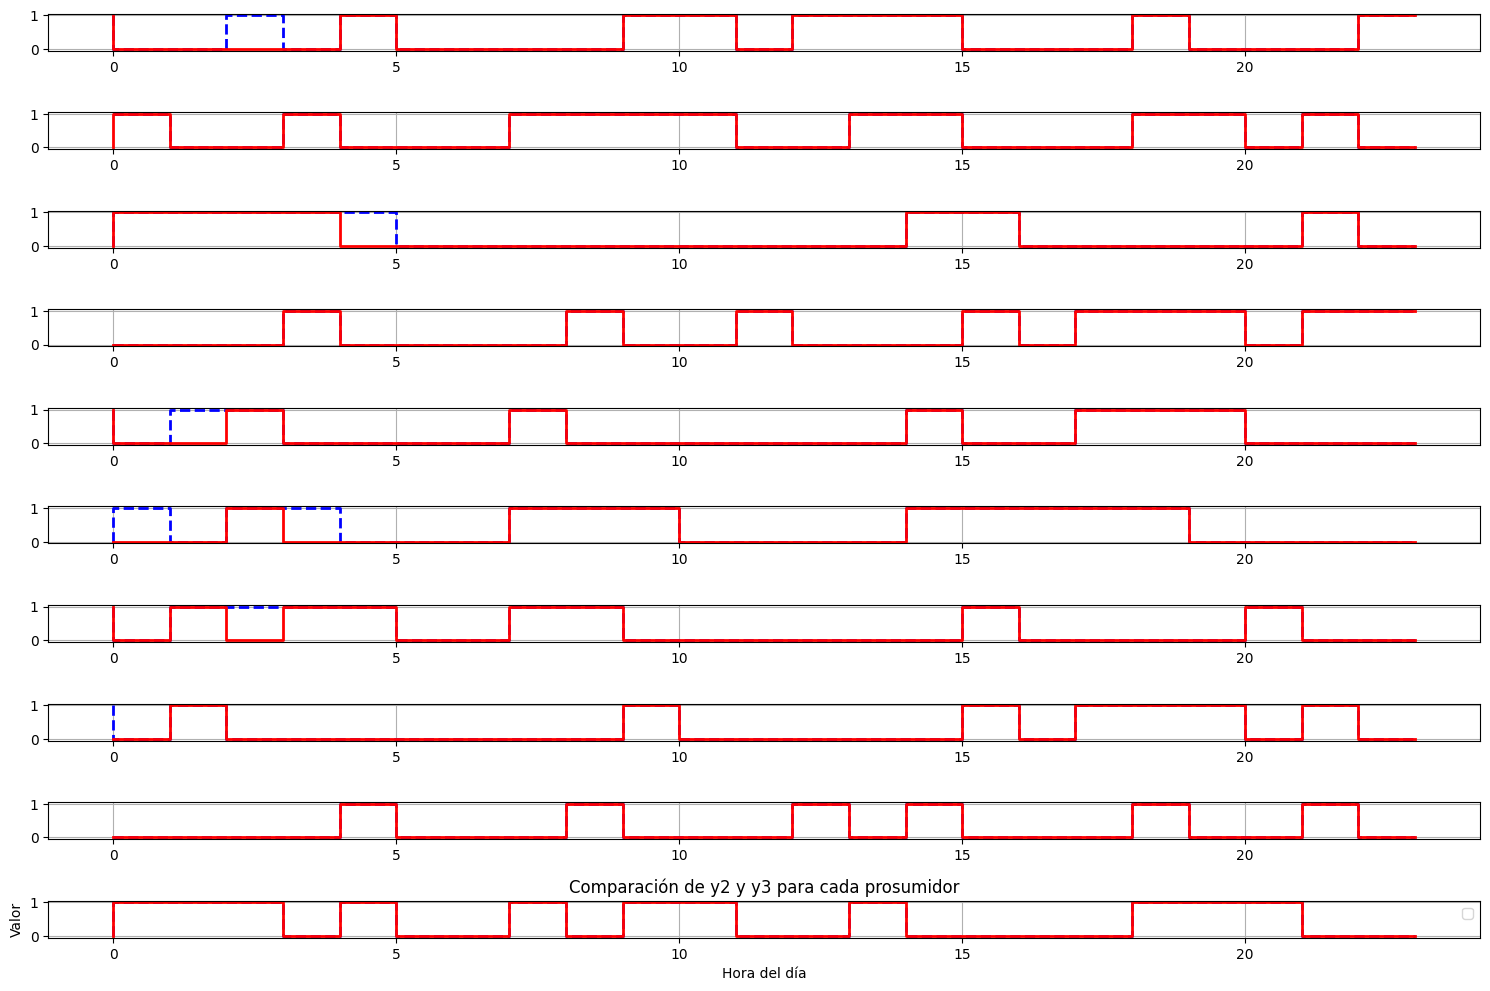

In [ ]:
import time

start_time = time.time()
y1 = np.sum(Fli_days, axis=0)

y2 = np.sum(Pvi_days, axis=0)

y3 = np.where(y1 < y2, 0, 1)
end_time = time.time()

# Tiempo transcurrido
elapsed_time = end_time - start_time
print(f"Tiempo transcurrido: {elapsed_time} segundos")

Pmb_days_classification = scipy.io.loadmat('/content/drive/MyDrive/Varios/UDENAR/MTE/Códigos Final/Data final/Pmb_days_classification.mat')

Pmb_days_classification = Pmb_days_classification['array']

# Definir una paleta de colores
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # 5 colores diferentes

plt.figure(figsize=(15, 10))

for i in range(10):
    plt.subplot(10, 1, i+1)
    plt.step(range(24), Pmb_days_classification[i], color='blue', linewidth=2, linestyle='--')
    plt.step(range(24), y3[i], color='red', linewidth=2, linestyle='-')
    plt.grid(True)

# Agregar leyenda y etiquetas
plt.legend(loc='upper right')
plt.xlabel('Hora del día')
plt.ylabel('Valor')
plt.title('Comparación de y2 y y3 para cada prosumidor')

plt.tight_layout()
plt.show()


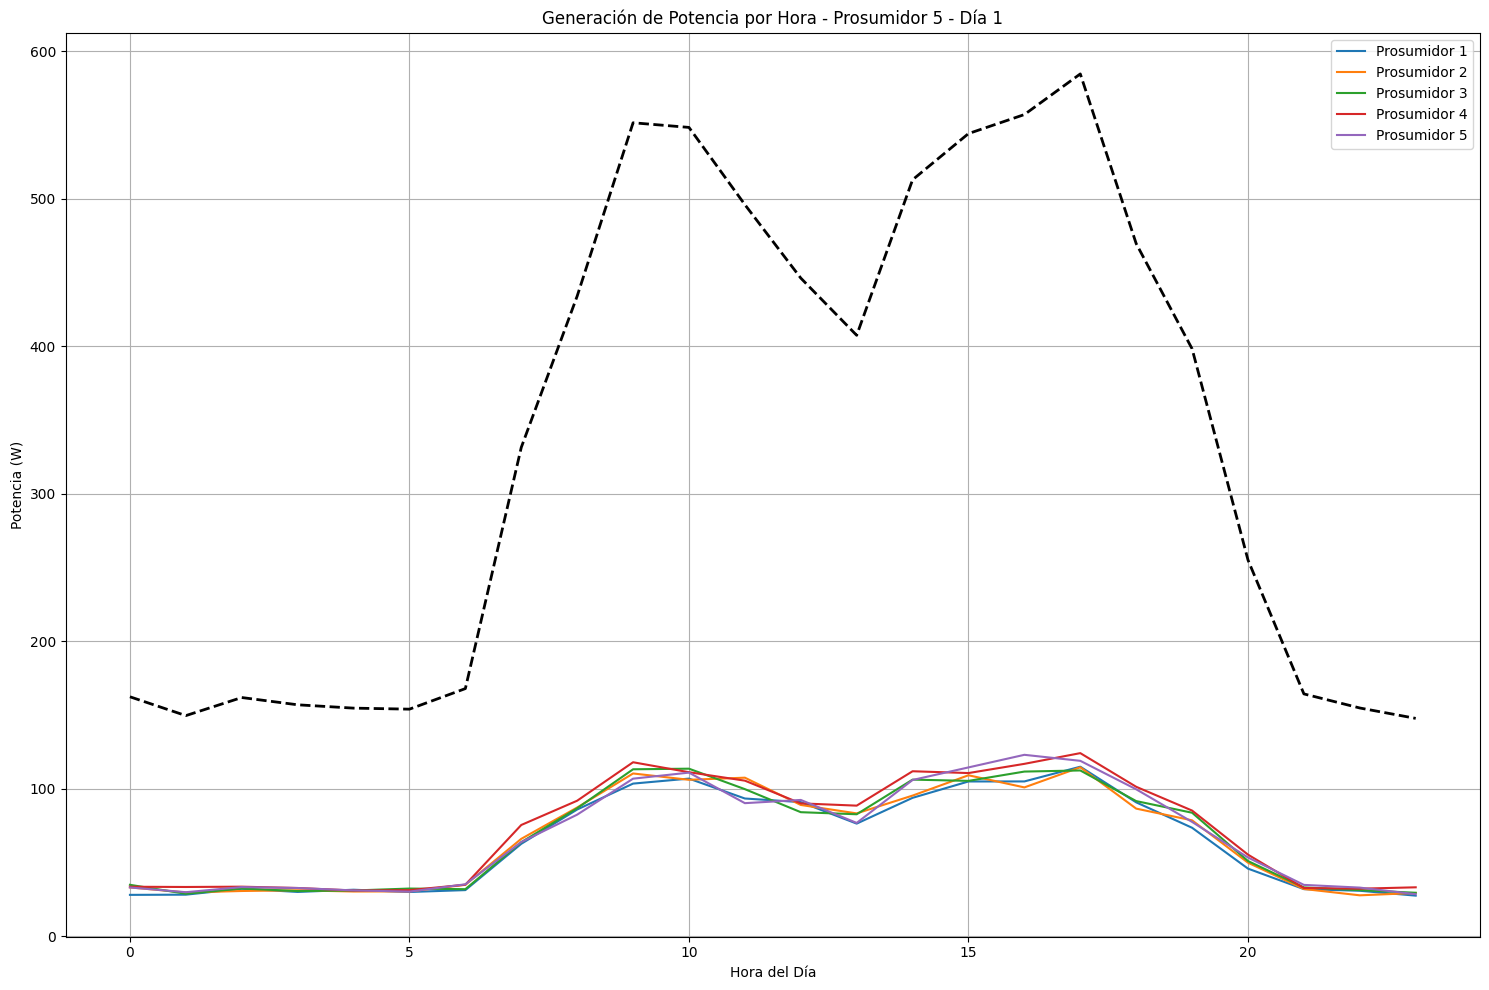

In [ ]:

# Seleccionar la primera fila y la primera columna de días
datos_para_graficar = Fli_days[:, 0, :]

# Calcular la suma de la generación de potencia para todos los prosumidores en el primer día
suma_generacion = np.sum(datos_para_graficar, axis=0)

# Graficar los datos para cada prosumidor
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.plot(range(24), datos_para_graficar[i], label=f'Prosumidor {i+1}')
    plt.title(f'Generación de Potencia por Hora - Prosumidor {i+1} - Día 1')
    plt.xlabel('Hora del Día')
    plt.ylabel('Potencia (W)')
    plt.grid(True)
    plt.legend()

# Graficar la suma de la generación de potencia para todos los prosumidores
plt.plot(range(24), suma_generacion, label='Suma Total', color='black', linewidth=2, linestyle='--')

plt.tight_layout()
plt.show()


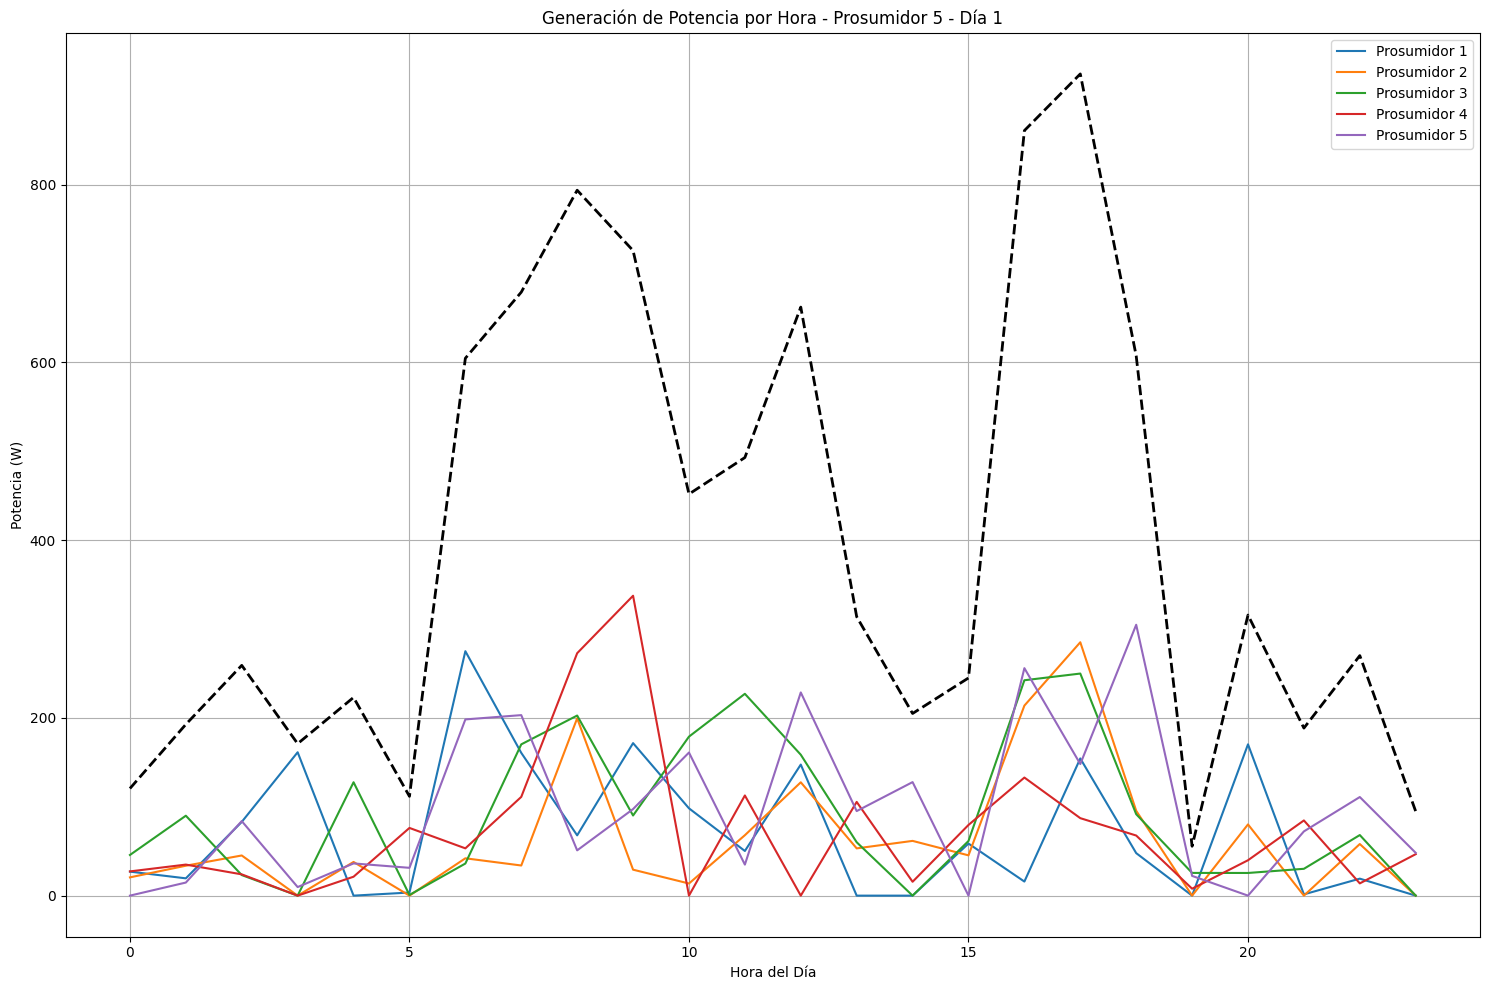

In [ ]:
# Seleccionar la primera fila y la primera columna de días
datos_para_graficar = Pvi_days[:, 0, :]

suma_generacion = np.sum(datos_para_graficar, axis=0)

# Graficar los datos para cada prosumidor
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.plot(range(24), datos_para_graficar[i], label=f'Prosumidor {i+1}')
    plt.title(f'Generación de Potencia por Hora - Prosumidor {i+1} - Día 1')
    plt.xlabel('Hora del Día')
    plt.ylabel('Potencia (W)')
    plt.grid(True)
    plt.legend()

plt.plot(range(24), suma_generacion, label='Suma Total', color='black', linewidth=2, linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
# # plt.subplot(dias_para_graficar, 1, i + 1)
# plt.plot(range(24), Fli_days[0,0])
# # plt.title(f'Generación de Potencia por Hora - Día {i+1} - Prosumidor 1')
# plt.xlabel('Hora del Día')
# plt.ylabel('Potencia (W)')
# plt.grid(True)
# plt.tight_layout()
# print(Fli_days[0,0])

In [ ]:
# # plt.subplot(dias_para_graficar, 1, i + 1)
# plt.plot(range(24), Pvi_days[0,0])
# # plt.title(f'Generación de Potencia por Hora - Día {i+1} - Prosumidor 1')
# plt.xlabel('Hora del Día')
# plt.ylabel('Potencia (W)')
# plt.grid(True)
# plt.tight_layout()
# print(Pvi_days[0,0])

In [ ]:
# import numpy as np

# # Matrices para diferentes días y prosumers
# num_days = 5
# prosumers = 5

# # Vectores originales
# Fli = np.array([
#   33.50320189 , 31.77490753,  33.0591391 ,  31.89771947,  32.63261985,
#   32.16159491 , 34.07566352,  66.99791367 , 91.03359283, 115.51180367,
#   116.47551621, 101.97166466 , 93.02321442,  84.0578697,  103.35863849,
#   113.40206528, 115.02036207, 125.13153886, 95.61673902 , 82.84684538,
#   50.22565181 , 33.28280684 , 30.67858968  ,31.25713595]) + 40

# Pvi = np.array([
#     220.55068786,  53.20021097 ,192.78060961, 727.54840466,  48.13237596,
#   73.22073943, 948.05506559, 642.80324868 ,262.0308145  ,469.83349651,
#   165.54027431, 187.49878188 ,553.00807657 ,  0.   ,        0.,
#   167.34034699, 168.13962124, 718.40532797 ,128.27895256 ,  0.,
#   499.52207171 ,108.41117445 , 92.33303601 ,  0.        ])

# # Función para añadir ruido
# def add_noise(vector, noise_level=0.05):
#     noise = np.random.normal(0, noise_level * np.std(vector), vector.shape)
#     return vector + noise

# # Crear matrices con ruido
# Fli_reshaped = np.array([add_noise(Fli) for _ in range(prosumers * num_days)]).reshape(prosumers, num_days, -1)
# Pvi_reshaped = np.array([add_noise(Pvi) for _ in range(prosumers * num_days)]).reshape(prosumers, num_days, -1)

# # Asignar las matrices generadas a las variables finales
# Fli_days = Fli_reshaped
# Pvi_days = Pvi_reshaped

# print(Fli_days.shape)
# print(Pvi_days.shape)


In [ ]:
################## Funciones ############################

def MGO_prices(Pgb, Pgs):
    np.random.seed(42)
    Pms = [np.random.uniform(Pgb,Pgs[i]) for i in range(24)]
    np.random.seed(42)
    Pmb = [np.random.uniform(Pgb,Pgs[i]) for i in range(24)]
    np.random.seed(42)
    for i in range(24):
        while Pmb[i] >= Pms[i]:
            Pms[i] = np.random.uniform(0,Pgs[i])
    return Pmb, Pms

def ProUi(sli, ki, Fli, Pms, Pvi, alpha, Pmb):
    NLi = [Fli[t] + sli[t] - Pvi[t] for t in range(24)]
    proUi = sum([ki*np.log(1 + Fli[t] + sli[t]) - Pms[t]*max(NLi[t],0) - Pmb[t]*min(NLi[t],0) + (Pvi[t])*alpha for t in range(24)])
    return - proUi

def restrict_demand(sli, sq, i):
    R1 = [sli[h] for h in range(24)]
    R1 = sum(R1) - sq[i]
    return R1

def max_ProUi(ProUi, restrict_demand, i, s0, ki, Fli, Pms, Pvi, alpha, Pmb):
    bounds = [(0,160) for _ in range(24)]
    sli0 = s0
    cons = ({'type': 'eq', 'fun':  restrict_demand, 'args': (sq, i)},)
    solution = minimize(ProUi, sli0, method='SLSQP', bounds=bounds, constraints=cons, args=(ki,Fli,Pms,Pvi,alpha,Pmb))
    sli = solution.x
    profit = solution.fun
    return sli, profit

def NLi(sli, Fli, Pvi):
    NLi = [Fli[j] + sli[j] - Pvi[j] for j in range(24)]
    return NLi

def Promk(Var, NiP):
    Pms = Var[:24]
    Pmb = Var[24:]
    NL = [sum(np.transpose(NiP)[h]) for h in range(24)]
    Promu = [sum([Pms[h]*max(NiP[i][h],0) for i in Ni]) + sum([Pmb[h]*min(NiP[i][h],0) for i in Ni]) for h in range(24)]
    Promg = [-Pgs[h]*max(NL[h],0) - Pgb*min(NL[h],0) for h in range(24)]
    Prom = [Promg[h] + Promu[h] for h in range(24)]
    return - sum(Prom)

def restrict_prices(Var):
    R1 = [-Var[h] + Var[h+24] for h in range(24)]
    return R1

#######################################################

ki = 100  # Número de cargas variables
alpha = 0.42  # Subsidio por KW

# prices de venta y compra de la red
Pgs = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.8, 0.8, 0.8, 1.3, 1.3, 1.3, 1.3, 0.8, 0.8, 0.8, 0.8, 1.3, 1.3, 1.3, 0.8, 0.8]
Pgb = 0.3

H = 24

# Matrices para diferentes días y prosumers
num_days = 3
prosumers = 5

# vectores de carga y generación de muestra
# Fli = np.array([
#     36355.37773, 36909.73582, 35156.5124, 35212.81573, 36246.33636, 34988.65863,
#     33354.26873, 64100.23309, 94653.12093, 101836.9903, 113092.1713, 107106.1929,
#     91616.77731, 87180.29814, 109746.4519, 117825.4882, 121402.949, 123648.0, 112261.0915,
#     89839.90739, 52086.81558, 40158.48462, 33324.42656, 31856.20865])/1000



# Fli = np.array([
#  33.50320189 , 31.77490753,  33.0591391 ,  31.89771947,  32.63261985,
#   32.16159491 , 34.07566352,  66.99791367 , 91.03359283, 115.51180367,
#  116.47551621, 101.97166466 , 93.02321442,  84.0578697,  103.35863849,
#  113.40206528, 115.02036207, 125.13153886, 95.61673902 , 82.84684538,
#   50.22565181 , 33.28280684 , 30.67858968  ,31.25713595]) - 10

# Pvi = np.array([
#     220.55068786,  53.20021097 ,192.78060961, 727.54840466,  48.13237596,
#   73.22073943, 948.05506559, 642.80324868 ,262.0308145  ,469.83349651,
#  165.54027431, 187.49878188 ,553.00807657 ,  0.   ,        0.,
#  167.34034699, 168.13962124, 718.40532797 ,128.27895256 ,  0.,
#  499.52207171 ,108.41117445 , 92.33303601 ,  0.        ])

# Fli_reshaped = np.tile(Fli, (prosumers, num_days, 1))
# Pvi_reshaped = np.tile(Pvi, (prosumers, num_days, 1))

# Pvi_days = Pvi_reshaped
# Fli_days = Fli_reshaped



# Pvi = np.array([
#     0, 0, 0, 0, 0, 0, 181.1455056, 744.2599612, 1143.959275, 1959.969462, 186.7711229,
#     90.16351004, 1660.573687, 1447.083592, 489.5034794, 213.2228566, 661.7779655,
#     296.1755764, 35.65105554, 0, 0, 0, 0, 0])

# Pvi = np.array([
#     0.  ,        110.26296078  ,  0.     ,     121.4752366 ,    0.,
#    23.63555068  , 77.14114561, 1396.96836449,  333.12524529,    2.73870601,
#   595.54657711  , 43.54882655,  602.31340605,    0.        ,    0.,
#   429.89790274 , 737.54077858,  400.76938573,  320.17513309,    0.,
#     0.         ,   0.         ,  20.40954959,  395.19865467])

# Repetir los vectores para crear la matriz 10x6x24 -> con la idea de organizar para todo el dataset
# Fli_reshaped = np.tile(Fli, (prosumers, num_days, 1))
# Pvi_reshaped = np.tile(Pvi, (prosumers, num_days, 1))

# Pvi_days = Pvi_reshaped
# Fli_days = Fli_reshaped

Ni = range(prosumers)
sq = [100, 20, 40, 30, 15, 12]

# Almacenar resultados por día
sli_opt_days = []
profit_opt_days = []
Pmb_days = []
Pms_days = []
Profit_Pms_Pmb_days = []

for day in range(num_days):
    print(f"Day {day+1}")

    Pmb, Pms = MGO_prices(Pgb, Pgs)
    Pmb = list((np.array(Pgb) + np.array(Pgs))/2 - 0.2*(np.array(Pgb) + np.array(Pgs))/2)
    Pms = list((np.array(Pgb) + np.array(Pgs))/2)
    Var0 = list(Pms) + list(Pmb) ###

    bounds1 = [(Pgb, Pgs[h]) for h in range(24)]
    bounds2 = [(Pgb, Pgs[h]) for h in range(24)]
    bounds = bounds1 + bounds2
    stop = 0

    while True:
        sli_opt = []
        profit_opt = []

        for i in Ni:
            # i = 0
            s0 = [sq[i] / H for h in range(H)]
            sli, profit = max_ProUi(ProUi, restrict_demand, i, s0, ki, Fli_days[i][day], Pms, Pvi_days[i][day], alpha, Pmb)
            sli_opt.append(sli)
            profit_opt.append(profit)

        NiP = [NLi(sli_opt[i], Fli_days[i][day], Pvi_days[i][day]) for i in Ni]

        cons1 = ({'type': 'ineq', 'fun': restrict_prices},)
        solution2 = minimize(Promk, Var0, method='SLSQP', bounds=bounds, constraints=cons1, args=(NiP))
        # solution2 = minimize(Promk, Var0, method='SLSQP', bounds=bounds, args=(NiP))
        prices = solution2.x

        Pmbk = prices[H:]
        Pmsk = prices[:H]

# ######################### Criterio de parada 1
        # numerator = np.linalg.norm(np.array([Pmsk, Pmbk]) - np.array([Pms, Pmb])) ** 2
        # denominator = np.linalg.norm(np.array([Pms, Pmb])) ** 2
        # norm_s = numerator / denominator

        # Pmb = Pmbk
        # Pms = Pmsk

        # stop = stop + 1
        # if norm_s <= 0.01:
        #     break
# ######################### Criterio de parada 2

        Pmb = Pmbk
        Pms = Pmsk

        Prom_opt = 0
        Prom_Pmb = 0
        Prom_Pms = 0

        ProUi_eval_opt = 0
        ProUi_eval_other = 0

        for i in Ni:
          # i = 0
          ProUi_eval_opt = ProUi_eval_other + ProUi(sli_opt[i], ki, Fli_days[i][day], Pms, Pvi_days[i][day], alpha, Pmb)
          # print(Fli_days[i][day])
          # print(Pvi_days[i][day])

        ProUi_eval_opt = ProUi_eval_opt

        print(f'cargas optimas: {ProUi_eval_opt}')

        for i in Ni:
          # i = 0
          s0 = [sq[i] / H for h in range(H)]
          ProUi_eval_other = ProUi_eval_other + ProUi(s0, ki, Fli_days[i][day], Pms, Pvi_days[i][day], alpha, Pmb)

        ProUi_eval_other = ProUi_eval_other
        print(f'cargas otras: {ProUi_eval_other}')

        # var_Pmb_Pms_eval = list(Pms) + list(Pmb)
        # var_Pmb_eval = [0.4] * H + list(Pmb)
        # var_Pms_eval =  list(Pms) + [0.3] * H

        var_Pmb_Pms_eval = list(Pms) + list(Pmb)
        var_Pmb_eval = list(Pmb) + list(Pmb)
        var_Pms_eval =  list(Pms) + list(Pms)

        Prom_opt = - Promk(var_Pmb_Pms_eval, NiP)
        Prom_Pmb = - Promk(var_Pmb_eval, NiP)
        Prom_Pms = - Promk(var_Pms_eval, NiP)

        print('----------------------------')
        print(f'prices optimos: {Prom_opt}')
        print(f'prices otros Pmb fija: { Prom_Pmb}')
        print(f'prices otros Pms fija: { Prom_Pms}')
        print('----------------------------')

        stop = stop + 1

        if Prom_opt >= Prom_Pmb and Prom_opt >= Prom_Pms and ProUi_eval_opt >= ProUi_eval_other and stop >2:
            break

        if stop > 50:
            print('*******************No se encontró una solución óptima********************')
            print(f'day: {day}')
            break

#####################################

    print(f'Iteraciones: {stop}')

    sli_opt_days.append(sli_opt)
    profit_opt_days.append(profit_opt)
    Pmb_days.append(Pmb)
    Pms_days.append(Pms)
    Profit_Pms_Pmb_days.append(solution2.fun)


Day 1
cargas optimas: -10968.266075921303
cargas otras: -52815.641703515284
----------------------------
prices optimos: 5.716053976367874e-06
prices otros Pmb fija: -1.4553412541751243e-06
prices otros Pms fija: -6.979366883985705e-06
----------------------------
cargas optimas: -10968.930977244227
cargas otras: -52815.64170819567
----------------------------
prices optimos: 1.135479955394203e-06
prices otros Pmb fija: -3.122822000989345e-08
prices otros Pms fija: -3.721683228263828e-07
----------------------------
cargas optimas: -10968.930977238546
cargas otras: -52815.641708849114
----------------------------
prices optimos: 4.7152814630635476e-07
prices otros Pmb fija: -1.2979851859995506e-08
prices otros Pms fija: -1.5503558259410966e-07
----------------------------
Iteraciones: 3
Day 2
cargas optimas: -10313.826908393783
cargas otras: -52625.97955429178
----------------------------
prices optimos: 9.759933888187078e-06
prices otros Pmb fija: -6.345839804744458e-07
prices otros P

In [ ]:
print(np.array(sli_opt_days).shape)
print(np.array(profit_opt_days).shape)
print(np.array(Pmb_days).shape)
print(np.array(Pms_days).shape)
print(np.array(Profit_Pms_Pmb_days).shape)

savemat('/content/drive/MyDrive/Varios/UDENAR/MTE/Códigos Final/Data final/sli_opt_days.mat', {'array':sli_opt_days})
savemat('/content/drive/MyDrive/Varios/UDENAR/MTE/Códigos Final/Data final/profit_opt_days.mat', {'array':profit_opt_days})
savemat('/content/drive/MyDrive/Varios/UDENAR/MTE/Códigos Final/Data final/Pmb_days.mat', {'array':Pmb_days})
savemat('/content/drive/MyDrive/Varios/UDENAR/MTE/Códigos Final/Data final/Pms_days.mat', {'array':Pms_days})
savemat('/content/drive/MyDrive/Varios/UDENAR/MTE/Códigos Final/Data final/Profit_Pms_Pmb_days.mat', {'array':Profit_Pms_Pmb_days})

(5000, 5, 24)
(5000, 5)
(5000, 24)
(5000, 24)
(5000,)


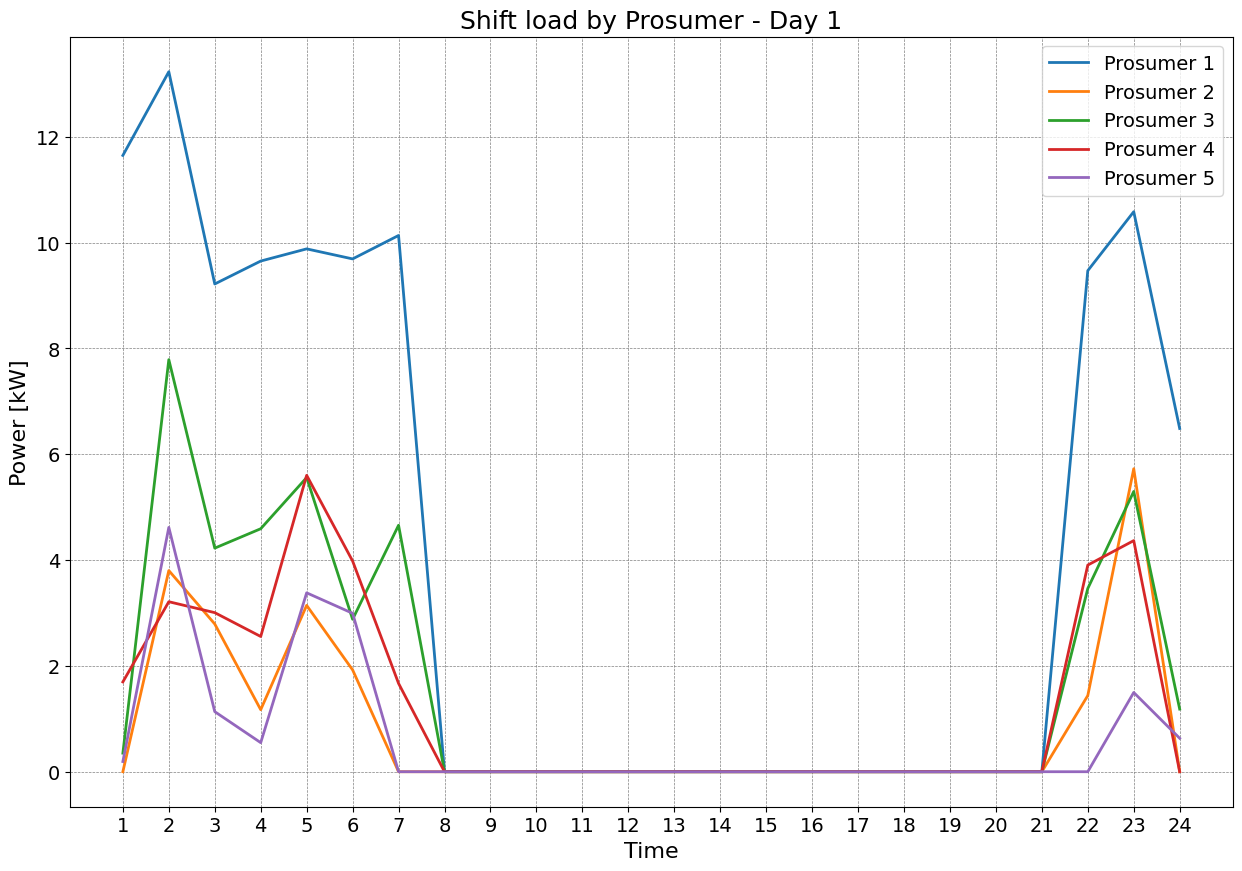

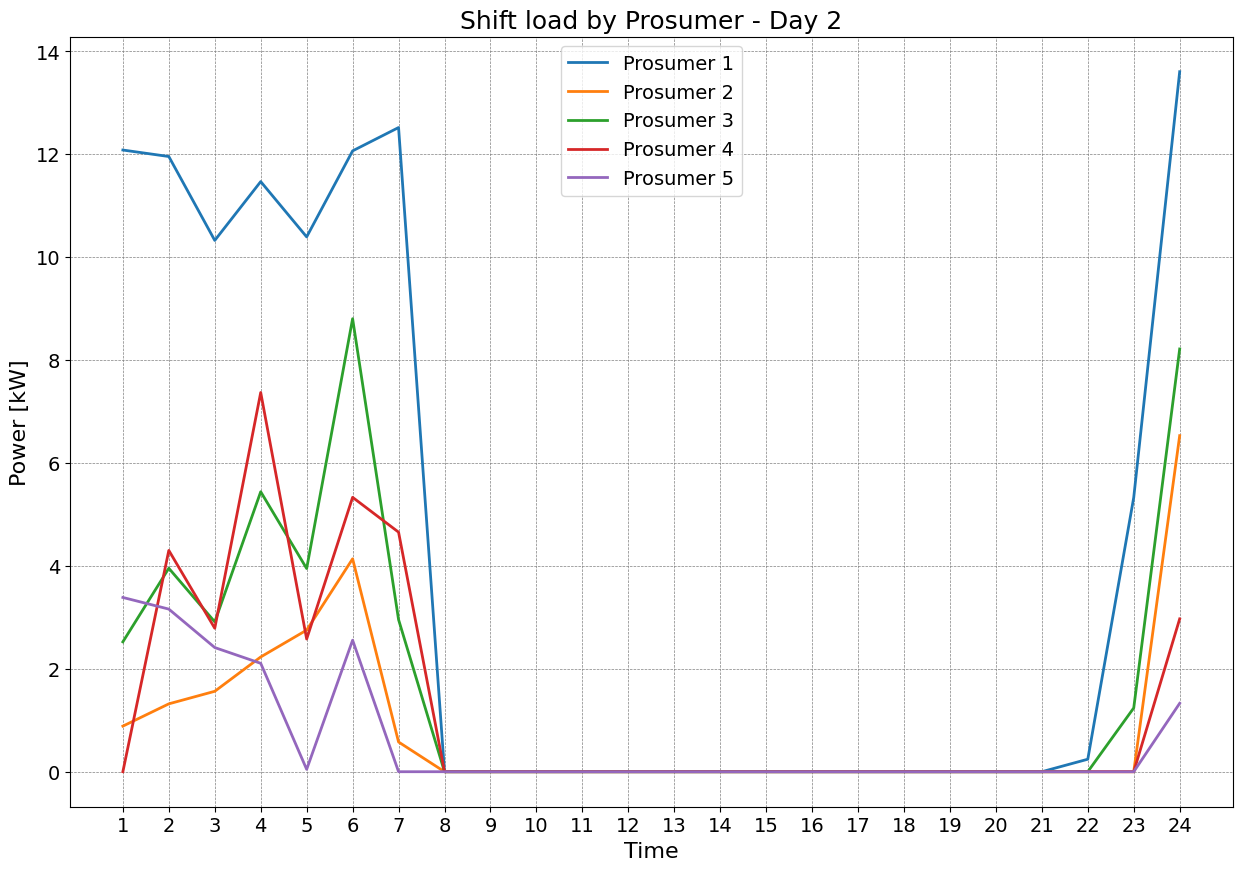

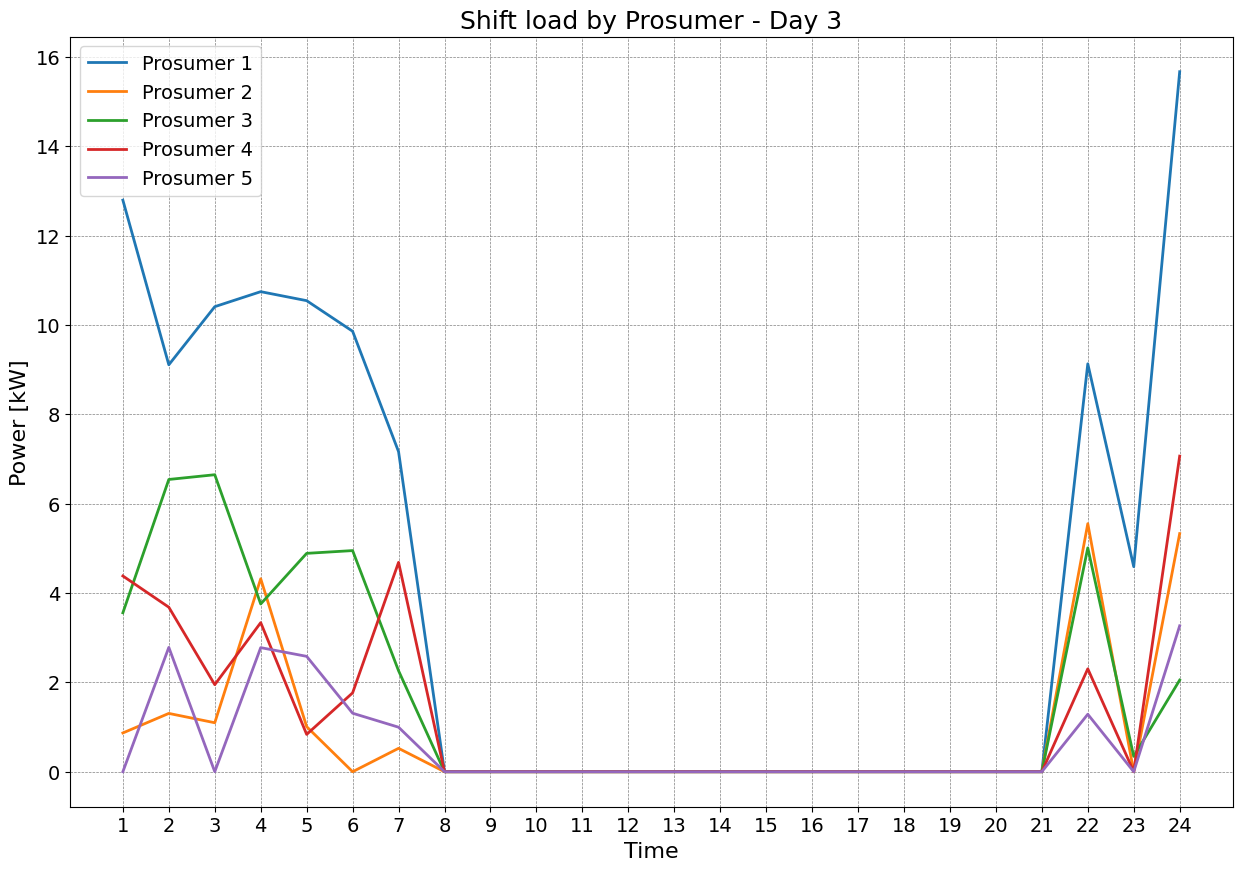

In [ ]:
import matplotlib.pyplot as plt
import random
import matplotlib.font_manager as fm

# Asegúrate de tener importadas las librerías necesarias y las variables definidas.

# Descargar e instalar la fuente Times New Roman
# !wget https://www.wfonts.com/download/data/2014/06/06/times-new-roman/times.ttf
# fm.fontManager.addfont('times.ttf')

# Selecciona días aleatorios para los gráficos
random_days = random.sample(range(len(sli_opt_days)), k=3)  # Por ejemplo, selecciona 5 días aleatorios

# Configuración de la fuente a Times New Roman
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14  # Tamaño de fuente general
plt.rcParams['axes.titlesize'] = 18  # Tamaño del título
plt.rcParams['axes.labelsize'] = 16  # Tamaño de las etiquetas de los ejes
plt.rcParams['xtick.labelsize'] = 14  # Tamaño de los números del eje x
plt.rcParams['ytick.labelsize'] = 14  # Tamaño de los números del eje y
plt.rcParams['legend.fontsize'] = 14  # Tamaño de la fuente de la leyenda

# Graficar para los días seleccionados

# Graficar para los días seleccionados
for day in random_days:
    x = range(1, H + 1)
    plt.figure(figsize=(15, 10))
    for i in Ni:
        plt.plot(x, sli_opt_days[day][i], label=f'Prosumer {i+1}', linewidth=2)  # Aumenta el grosor de las líneas
    plt.title(f"Shift load by Prosumer - Day {day+1}")
    plt.xlabel("Time")
    plt.ylabel("Power [kW]")
    plt.legend()
    plt.xticks(x)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')  # Configura la grilla para que sea más visible
    plt.ioff()
    plt.show()



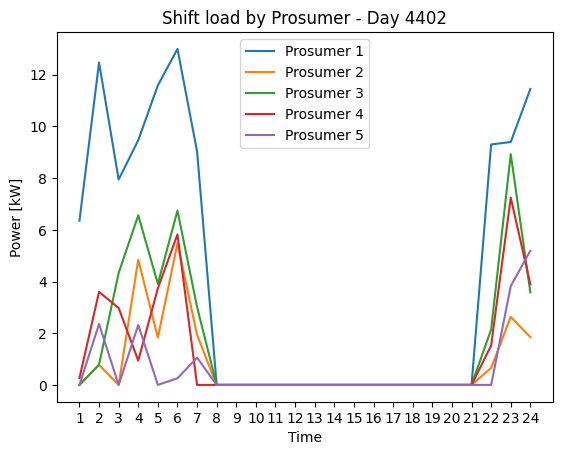

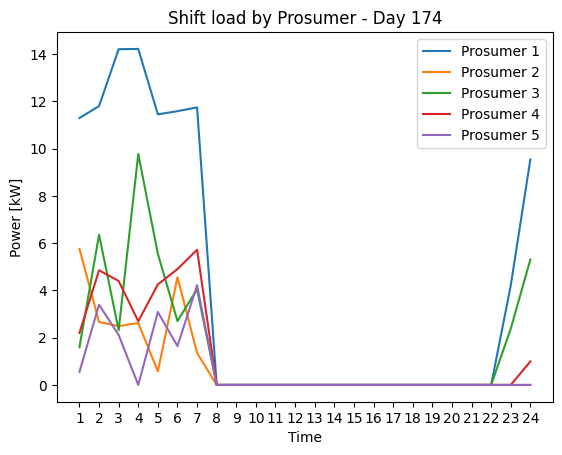

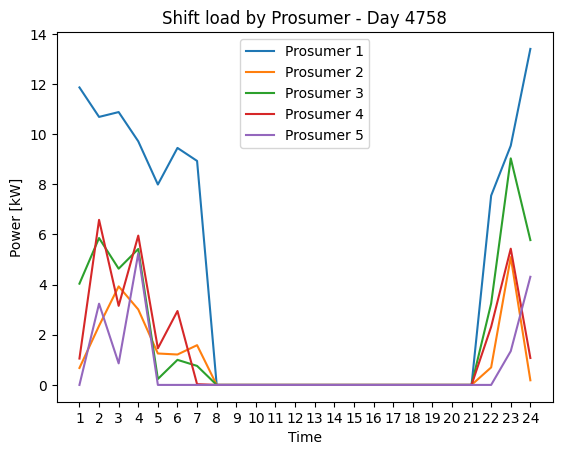

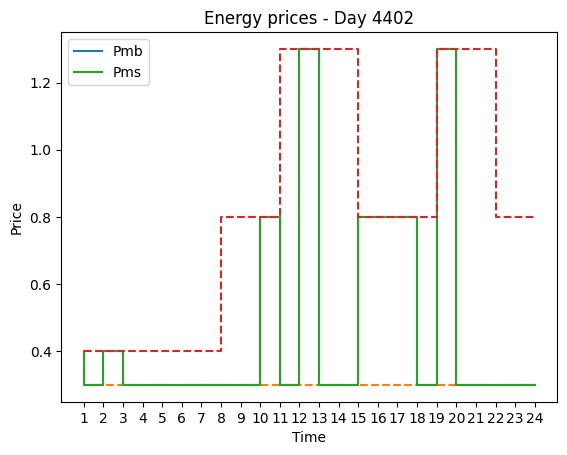

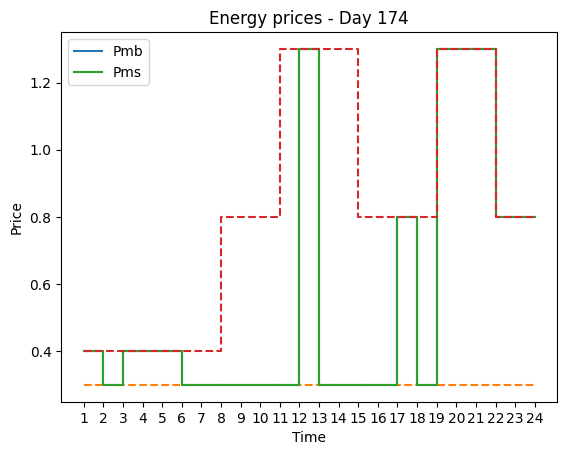

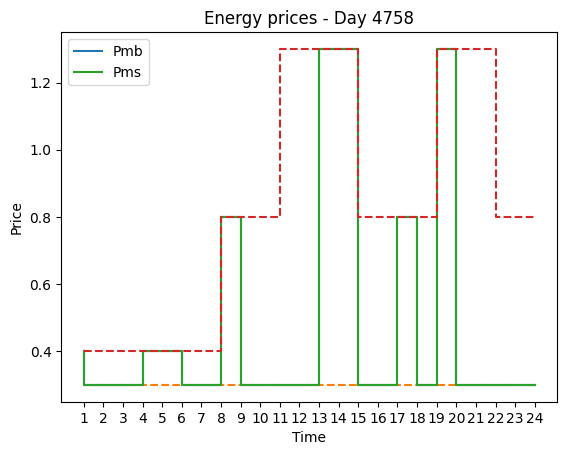

In [ ]:
# Seleccionar días aleatorios para graficar
random_days = random.sample(range(num_days), 3)

for day in random_days:
    x = range(1, H + 1)
    for i in Ni:
        plt.plot(x, sli_opt_days[day][i], label=f'Prosumer {i+1}')
    plt.title(f"Shift load by Prosumer - Day {day+1}")
    plt.xlabel("Time")
    plt.ylabel("Power [kW]")
    plt.legend()
    plt.xticks(x)
    plt.ioff()
    plt.show()

for day in random_days:
    x = range(1, H + 1)
    plt.step(x, Pmb_days[day], label='Pmb')
    plt.step(x, Pgb * np.ones((24)), linestyle="--")
    plt.step(x, Pms_days[day], label='Pms')
    plt.step(x, Pgs, linestyle="--")
    plt.title(f"Energy prices - Day {day+1}")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.xticks(x)
    plt.ioff()
    plt.show()

In [ ]:
import numpy as np

Pmb_days = scipy.io.loadmat('/content/drive/MyDrive/Varios/UDENAR/MTE/Códigos Final/Data final/Pmb_days.mat')

Pmb_days = Pmb_days['array']

# Supongamos que Pmb_days es una lista de listas (como en tu caso)
# Pmb_days = [
#   [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.8, 0.8, 0.8, 1.3, 1.3, 1.3, 1.3, 0.8, 0.8, 0.8, 0.8, 1.3, 1.3, 1.3, 0.8, 0.8],
#   [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
#   [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.8, 0.8, 0.8, 1.3, 1.3, 1.3, 1.3, 0.8, 0.8, 0.8, 0.8, 1.3, 1.3, 1.3, 0.8, 0.8],
#   [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
#   [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.8, 0.8, 0.8, 1.3, 1.3, 1.3, 1.3, 0.8, 0.8, 0.8, 0.8, 1.3, 1.3, 1.3, 0.8, 0.8]
# ]

# Asegurarse de que Pmb_days sea un array de NumPy
Pmb_days = np.array(Pmb_days)

# Valor de Pgb
# Pgb = 0.3

# Crear un nuevo vector para la clasificación
Pmb_days_classification = np.where(Pmb_days == Pgb, 0, 1)
Pms_days_classification = np.where(Pms_days == Pgs, 0, 1)

# Verificar que las dimensiones sean correctas
print("Dimensiones de Pmb_days:", Pmb_days.shape)
print("Dimensiones de Pmb_days_classification:", Pmb_days_classification.shape)

# Verificar algunas filas para confirmar la clasificación
print("\nPmb_days original (primeras 5 filas):")
print(Pmb_days[:5])
print("\nPmb_days_classification (primeras 5 filas):")
print(Pmb_days_classification[:5])

savemat('/content/drive/MyDrive/Varios/UDENAR/MTE/Códigos Final/Data final/Pmb_days_classification.mat', {'array':Pmb_days_classification})
savemat('/content/drive/MyDrive/Varios/UDENAR/MTE/Códigos Final/Data final/Pms_days_classification.mat', {'array':Pms_days_classification})


NameError: name 'scipy' is not defined